# Importación de Librerías


In [0]:
#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import functions

In [0]:
try:  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
except:  
  

In [0]:
#Lectura de datos
try:
  #Caso en que se esté usando jupyter notebooks o se encuentre los archivos de la data en el entorno de ejecución del notebook
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, y los archivos de la data estén en una carpeta del Drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)


In [6]:
 data_pulsar.head()

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Normalización de la data

Ejecutamos la normalización del dataset.

In [15]:
head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
scaler = MinMaxScaler()
scaler.fit(data_pulsar)
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns =head)
data_pulsar_scaled.describe()

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,0.563516,0.294263,0.236676,0.050966,0.055566,0.183555,0.303691,0.089553,0.091574
std,0.137325,0.092467,0.106987,0.088247,0.132059,0.188537,0.119591,0.089285,0.288432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.509180,0.237869,0.191353,0.022939,0.007661,0.068430,0.236757,0.030962,0.000000
50%,0.584919,0.299640,0.211075,0.028480,0.011599,0.107395,0.307141,0.071285,0.000000
75%,0.649199,0.354712,0.236220,0.038912,0.023528,0.203905,0.367371,0.118432,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Realizamos la partición de la data de entrenamiento, validación y test.

In [0]:
#Partición de la data escalada
X_sca = data_pulsar_scaled.drop(columns=["is_pulsar"])
y_sca = data_pulsar_scaled["is_pulsar"]

X_trainval_sca, X_test_sca, y_trainval_sca, y_test_sca = train_test_split(X_sca, y_sca, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train_sca, X_val_sca, y_train_sca, y_val_sca = train_test_split(X_trainval_sca, y_trainval_sca, test_size=0.2, random_state=0)


# Análisis de Algoritmos con Data Normalizada

## 1° Algoritmo: Random Forest

El MSE para el modelo RandomForestClassifier es:  0.02201774564574433
El accuracy para el modelo RandomForestClassifier es:  0.9779822543542557
El precision para el modelo RandomForestClassifier es:  0.9344262295081968
El recall para el modelo RandomForestClassifier es:  0.8172043010752689
El F1-score para el modelo RandomForestClassifier es:  0.8718929254302105


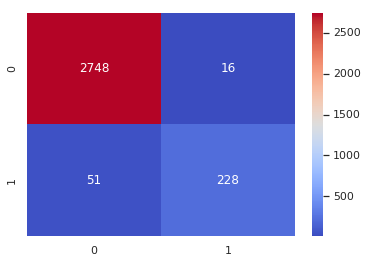

In [47]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model.fit(X_train_sca, y_train_sca)
functions.eval_model(RF_model, X_val_sca, y_val_sca)

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

RF_grid_param = {  
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3]
}
RF_gd = GridSearchCV(estimator=RF_model,  
                     param_grid=RF_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
RF_gd.fit(X_train_sca, y_train_sca)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion

In [85]:
RF_gd.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}

El MSE para el modelo RandomForestClassifier es:  0.020046007229707525
El accuracy para el modelo RandomForestClassifier es:  0.9799539927702925
El precision para el modelo RandomForestClassifier es:  0.9291338582677166
El recall para el modelo RandomForestClassifier es:  0.8458781362007168
El F1-score para el modelo RandomForestClassifier es:  0.8855534709193245


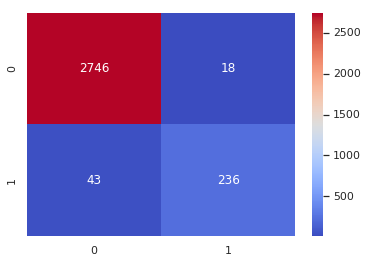

In [87]:
functions.eval_model(RF_gd.best_estimator_, X_val_sca, y_val_sca)

## 2° Algoritmo: SVM

El MSE para el modelo SVC es:  0.025303976339139007
El accuracy para el modelo SVC es:  0.9746960236608609
El precision para el modelo SVC es:  0.9508928571428571
El recall para el modelo SVC es:  0.7634408602150538
El F1-score para el modelo SVC es:  0.8469184890656063


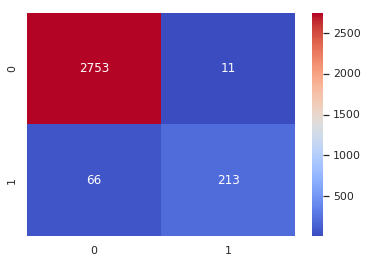

In [23]:
from sklearn.svm import SVC

SVM_model = SVC(gamma='auto',kernel='rbf')
SVM_model.fit(X_train_sca, y_train_sca)
functions.eval_model(SVM_model, X_val_sca, y_val_sca)

In [0]:
SVM_grid_param = {  
    'C': [1, 10, 100],
    'gamma': ['auto',0.01, 0.0001],
    'kernel': ['rbf']
}

In [76]:
SVM_gd_sr2 = GridSearchCV(estimator=SVM_model_sm,  
                     param_grid=SVM_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
SVM_gd_sr2.fit(X_train_sca, y_train_sca)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 0.01, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [77]:
SVM_gd_sr2.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

El MSE para el modelo SVC es:  0.019717384160368057
El accuracy para el modelo SVC es:  0.9802826158396319
El precision para el modelo SVC es:  0.9362549800796812
El recall para el modelo SVC es:  0.8422939068100358
El F1-score para el modelo SVC es:  0.8867924528301886


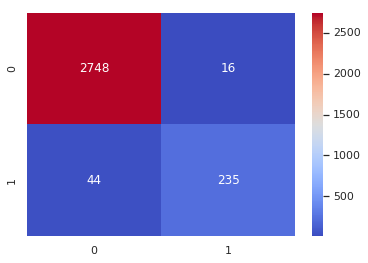

In [78]:
functions.eval_model(SVM_gd_sr2.best_estimator_, X_val_sca, y_val_sca)

## 3° Algoritmo: KNN

El MSE para el modelo KNeighborsClassifier es:  0.020046007229707525
El accuracy para el modelo KNeighborsClassifier es:  0.9799539927702925
El precision para el modelo KNeighborsClassifier es:  0.9291338582677166
El recall para el modelo KNeighborsClassifier es:  0.8458781362007168
El F1-score para el modelo KNeighborsClassifier es:  0.8855534709193245


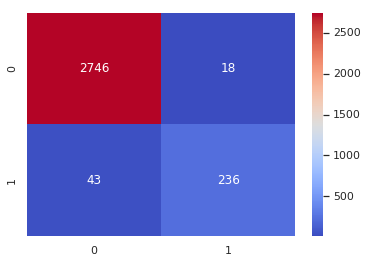

In [24]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_sca, y_train_sca)
functions.eval_model(KNN_model, X_val_sca, y_val_sca)

In [90]:
KNN_grid_param = {  
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance'],
    'p': [1,2]
}
KNN_gd_sr = GridSearchCV(estimator=KNN_model,  
                     param_grid=KNN_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
KNN_gd_sr.fit(X_train_sca, y_train_sca)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11, 19], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [91]:
KNN_gd_sr.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

El MSE para el modelo KNeighborsClassifier es:  0.019060138021689123
El accuracy para el modelo KNeighborsClassifier es:  0.9809398619783108
El precision para el modelo KNeighborsClassifier es:  0.9299610894941635
El recall para el modelo KNeighborsClassifier es:  0.8566308243727598
El F1-score para el modelo KNeighborsClassifier es:  0.8917910447761195


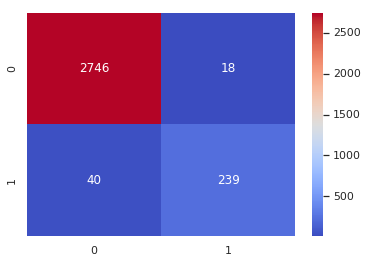

In [92]:
functions.eval_model(KNN_gd_sr.best_estimator_, X_val_sca, y_val_sca)

## 4° Algoritmo: Red Neuronal

El MSE para el modelo MLPClassifier es:  0.01807426881367072
El accuracy para el modelo MLPClassifier es:  0.9819257311863293
El precision para el modelo MLPClassifier es:  0.9274809160305344
El recall para el modelo MLPClassifier es:  0.8709677419354839
El F1-score para el modelo MLPClassifier es:  0.8983364140480593


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


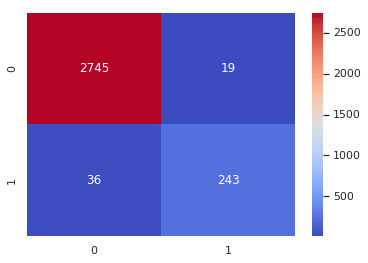

In [25]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()
NN_model.fit(X_train_sca, y_train_sca)
functions.eval_model(NN_model, X_val_sca, y_val_sca)

In [96]:

NN_grid_param = {  
    'activation':['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam']
}
NN_gd_sr = GridSearchCV(estimator=NN_model,  
                     param_grid=NN_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
NN_gd_sr.fit(X_train_sca, y_train_sca)  

KeyboardInterrupt: ignored

#  Análisis de Algoritmos con Data Normalizada y Balanceada

## Aplicación de SVMSMOTE


Variante del algoritmo SMOTE que utiliza un algoritmo SVM para detectar la muestra que se usará para generar nuevas muestras sintéticas, utiliza un clasificador SVM para encontrar vectores de soporte y generar las muestras.

*Referencia: https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#imblearn.over_sampling.SVMSMOTE*

Dado que el conjunto de datos presenta un problema de desbalance de datos, se decidi aplicar la técnica de over-sampling SVMSMOTE.

Aplicamos SVMSMOTE en el conjunto de entrenamiento.

In [0]:
#https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#r88acb9955f91-2
from imblearn.over_sampling import SVMSMOTE
smt = SVMSMOTE(random_state=12)
X_resampled, y_resampled = smt.fit_resample(X_train_sca, y_train_sca)
X_train_svmsmote = pd.DataFrame(X_resampled)
y_train_svmsmote = pd.Series(y_resampled)

In [32]:
print("* Antes del proceso de over-sampling, se tiene {} valores de la clase '1'".format(sum(y_train_sca==1)))
print("* Antes del proceso de over-sampling, se tiene {} valores de la clase '0'\n".format(sum(y_train_sca==0)))


print("* Después del proceso de over-sampling, se tiene {} valores de la clase '1'".format(sum(y_train_svmsmote==1)))
print("* Después del proceso de over-sampling, se tiene {} valores de la clase '0'".format(sum(y_train_svmsmote==0)))

* Antes del proceso de over-sampling, se tiene 1150 valores de la clase '1'
* Antes del proceso de over-sampling, se tiene 11020 valores de la clase '0'

* Después del proceso de over-sampling, se tiene 11020 valores de la clase '1'
* Después del proceso de over-sampling, se tiene 11020 valores de la clase '0'


In [0]:
from imblearn.over_sampling import BorderlineSMOTE
bls = BorderlineSMOTE()
X_resampled, y_resampled = bls.fit_resample(X_train_sca, y_train_sca)
X_train_blsmote = pd.DataFrame(X_resampled)
y_train_blsmote  = pd.Series(y_resampled)

In [42]:
print("* Antes del proceso de over-sampling, se tiene {} valores de la clase '1'".format(sum(y_train_sca==1)))
print("* Antes del proceso de over-sampling, se tiene {} valores de la clase '0'\n".format(sum(y_train_sca==0)))


print("* Después del proceso de over-sampling, se tiene {} valores de la clase '1'".format(sum(y_train_blsmote==1)))
print("* Después del proceso de over-sampling, se tiene {} valores de la clase '0'".format(sum(y_train_blsmote==0)))

* Antes del proceso de over-sampling, se tiene 1150 valores de la clase '1'
* Antes del proceso de over-sampling, se tiene 11020 valores de la clase '0'

* Después del proceso de over-sampling, se tiene 11020 valores de la clase '1'
* Después del proceso de over-sampling, se tiene 11020 valores de la clase '0'


## 1° Algoritmo: Random Forest

El MSE para el modelo RandomForestClassifier es:  0.057837660203746304
El accuracy para el modelo RandomForestClassifier es:  0.9421623397962537
El precision para el modelo RandomForestClassifier es:  0.6235011990407674
El recall para el modelo RandomForestClassifier es:  0.931899641577061
El F1-score para el modelo RandomForestClassifier es:  0.7471264367816092


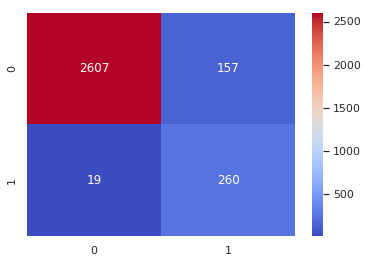

In [56]:
from sklearn.ensemble import RandomForestClassifier

RF_model_sm = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model_sm.fit(X_train_svmsmote, y_train_svmsmote)
functions.eval_model(RF_model_sm, X_val_sca, y_val_sca)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

RF_grid_param = {  
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3]
}

In [74]:
RF_gd_sr = GridSearchCV(estimator=RF_model_sm,  
                     param_grid=RF_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
RF_gd_sr.fit(X_train_svmsmote, y_train_svmsmote)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion

In [82]:
RF_gd_sr.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}

El MSE para el modelo RandomForestClassifier es:  0.05816628327308577
El accuracy para el modelo RandomForestClassifier es:  0.9418337167269142
El precision para el modelo RandomForestClassifier es:  0.6202830188679245
El recall para el modelo RandomForestClassifier es:  0.942652329749104
El F1-score para el modelo RandomForestClassifier es:  0.7482219061166429


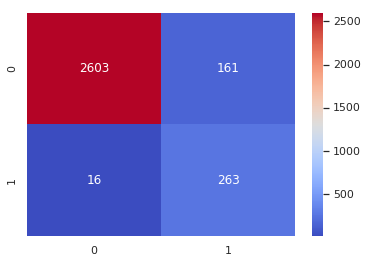

In [83]:
functions.eval_model(RF_gd_sr.best_estimator_, X_val_sca, y_val_sca)

## 2° Algoritmo: SVM

El MSE para el modelo SVC es:  0.05718041406506737
El accuracy para el modelo SVC es:  0.9428195859349326
El precision para el modelo SVC es:  0.624113475177305
El recall para el modelo SVC es:  0.946236559139785
El F1-score para el modelo SVC es:  0.7521367521367522


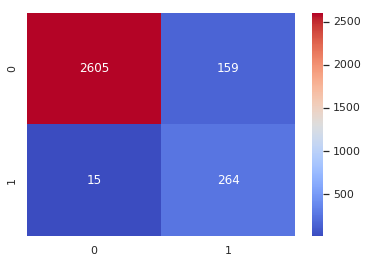

In [59]:
from sklearn.svm import SVC

SVM_model_sm = SVC(gamma='auto',kernel='rbf')
SVM_model_sm.fit(X_train_svmsmote, y_train_svmsmote)
functions.eval_model(SVM_model_sm, X_val_sca, y_val_sca)

In [0]:
SVM_grid_param = {  
    'C': [1, 10, 100],
    'gamma': ['auto',0.01, 0.0001],
    'kernel': ['rbf']
}

In [79]:
SVM_gd_sr = GridSearchCV(estimator=SVM_model_sm,  
                     param_grid=SVM_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
SVM_gd_sr.fit(X_train_svmsmote, y_train_svmsmote)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 0.01, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

El MSE para el modelo SVC es:  0.038777522182057184
El accuracy para el modelo SVC es:  0.9612224778179428
El precision para el modelo SVC es:  0.7169811320754716
El recall para el modelo SVC es:  0.953405017921147
El F1-score para el modelo SVC es:  0.8184615384615385


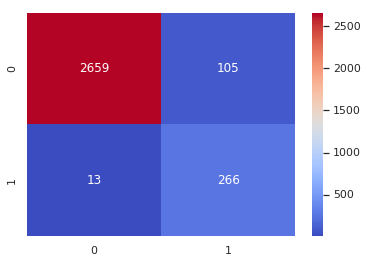

In [80]:
functions.eval_model(SVM_gd_sr.best_estimator_, X_val_sca, y_val_sca)

In [81]:
SVM_gd_sr.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

## 3° Algoritmo: KNN

El MSE para el modelo KNeighborsClassifier es:  0.03812027604337825
El accuracy para el modelo KNeighborsClassifier es:  0.9618797239566218
El precision para el modelo KNeighborsClassifier es:  0.7282913165266106
El recall para el modelo KNeighborsClassifier es:  0.931899641577061
El F1-score para el modelo KNeighborsClassifier es:  0.8176100628930817


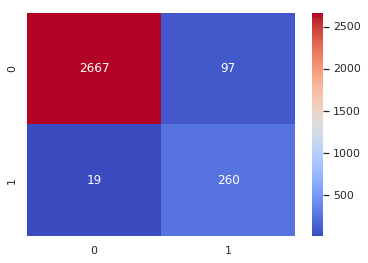

In [60]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model_sm = KNeighborsClassifier(n_neighbors=5)
KNN_model_sm.fit(X_train_svmsmote, y_train_svmsmote)
functions.eval_model(KNN_model_sm, X_val_sca, y_val_sca)

## 4° Algoritmo: Red Neuronal

El MSE para el modelo MLPClassifier es:  0.03943476832073611
El accuracy para el modelo MLPClassifier es:  0.9605652316792639
El precision para el modelo MLPClassifier es:  0.7131367292225201
El recall para el modelo MLPClassifier es:  0.953405017921147
El F1-score para el modelo MLPClassifier es:  0.8159509202453988


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


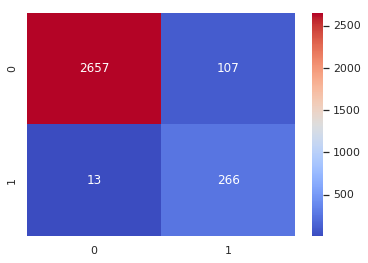

In [61]:
from sklearn.neural_network import MLPClassifier

NN_model_sm = MLPClassifier()
NN_model_sm.fit(X_train_svmsmote, y_train_svmsmote)
functions.eval_model(NN_model_sm, X_val_sca, y_val_sca)